In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [4]:
df = pd.read_csv('dataset.csv')

In [6]:
df.isnull().sum()

Data            0
Total_Vendas    0
dtype: int64

In [8]:
df.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [10]:
#Convertendo coluna data para formato datetime
df['Data'] = pd.to_datetime(df['Data'])

In [13]:
df.dtypes

Data            datetime64[ns]
Total_Vendas           float64
dtype: object

In [17]:
serie_temporal = df.set_index(df['Data'])['Total_Vendas']
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Name: Total_Vendas, Length: 365, dtype: float64

In [19]:
#Frequencia da seria temporal, convetendo para dia com o parametro D
serie_temporal = serie_temporal.asfreq('D')

In [21]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Freq: D, Name: Total_Vendas, Length: 365, dtype: float64

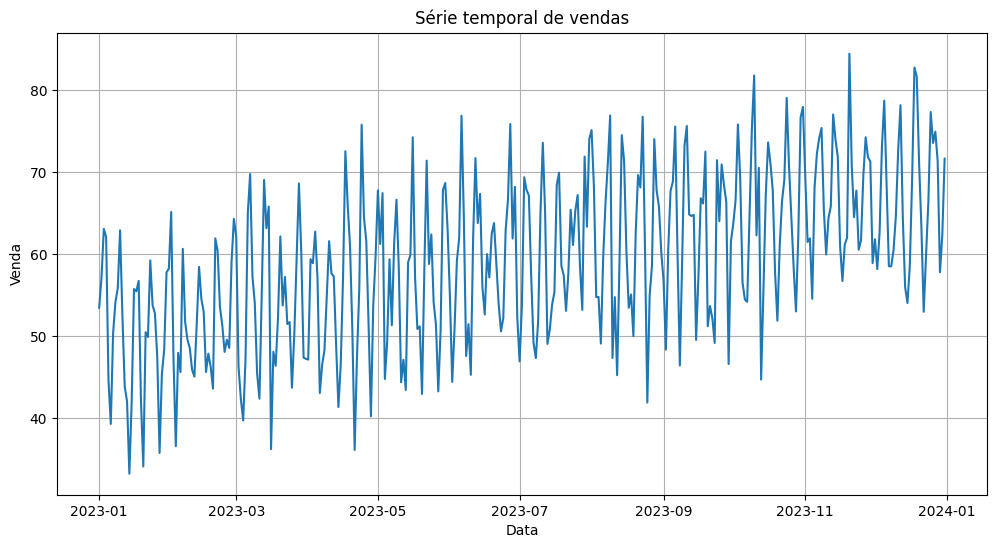

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal)
plt.xlabel('Data')
plt.ylabel('Venda')
plt.title('Série temporal de vendas')
plt.grid(True)
plt.show()

In [26]:
#Suavização Exponencial
modelo = SimpleExpSmoothing(serie_temporal)

In [28]:
modelo_ajustado = modelo.fit(smoothing_level=0.2)

d:\Pedro Machado\Downloads\Cursos\01 - T.I\estudos\Python\framework\data_science\curso\venv\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [30]:
suavizacao_exponencial = modelo_ajustado.fittedvalues

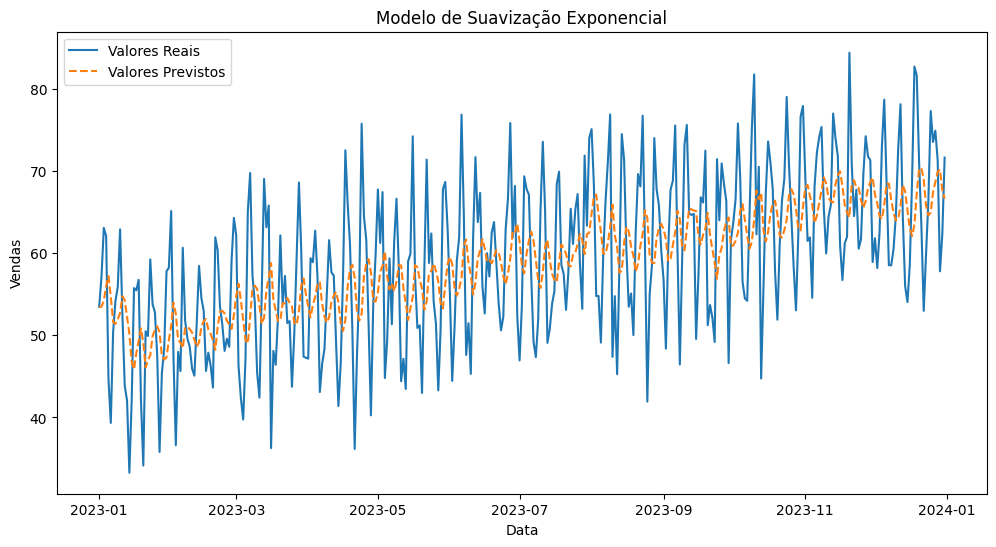

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal, label='Valores Reais')
plt.plot(suavizacao_exponencial, label='Valores Previstos', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Modelo de Suavização Exponencial')
plt.legend()
plt.show()

In [46]:
# Forcast Previsão sobre os proximos periodos de tempo, indicando os passos que serão dados em dias.
num_previsao = 1
previsoes = modelo_ajustado.forecast(steps = num_previsao)
previsoes

2024-01-01    67.649892
Freq: D, dtype: float64

In [44]:
print(f'Previsao Total de Vendas para Jan: {round(previsoes[0], 4)}')

Previsao Total de Vendas para Jan: 67.6499


C:\Users\Pedro Machado\AppData\Local\Temp\ipykernel_3316\1868877896.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Previsao Total de Vendas para Jan: {round(previsoes[0], 4)}')
